
# Transfer Learning na YOLOv11 utilizando o dataset COCO

Este projeto visa aplicar o conceito de Aprendizado de Transferência na arquitetura YOLOv3 para a detecção de objetos. Utilizaremos o conjunto de dados COCO, que é um dos conjuntos de dados mais populares para detecção de objetos, contendo milhões de imagens com anotações de objetos.

A YOLOv3 é uma arquitetura de rede neural convolucional (CNN) que é conhecida por sua capacidade de detectar objetos em tempo real. Ela é capaz de identificar vários objetos em uma única imagem e é extremamente rápida, tornando-a ideal para aplicações em tempo real.

Tranfer Learning é uma técnica onde um modelo pré-treinado é usado como ponto de partida para um novo modelo. Neste projeto, utilizaremos as ponderações de uma YOLOv3 pré-treinada aplicada ao conjunto de dados COCO. Isso nos permite aproveitar o aprendizado anterior do modelo e aplicá-lo ao nosso novo problema, economizando tempo e recursos computacionais.

## Objetivo
Ao final deste projeto, busco um modelo capaz de detectar e identificar objetos com alta precisão e velocidade.

## Passos
- Pré-requisitos: Antes de começar, é necessário baixar o conjunto de dados de detecção COCO e instalar o pycocotools1.
- Configuração do Projeto: Inicialize o projeto e configure os seguintes componentes:
  - Configuração de Dados
  - Configuração do Modelo
  - Configuração de Perda e Métrica
  - Configuração do Otimizador
  - Configuração do Transformador
- Treinamento: Após a configuração, o próximo passo é treinar o modelo. O YOLOv3 é um algoritmo extremamente rápido de detecção de múltiplos objetos que usa uma rede neural convolucional (CNN) para detectar e identificar objetos.
- Transfer Learning: O aprendizado de transferência é aplicado no YOLOv3. Você pode inicializar todas as ponderações de um YOLOv3 pré-treinado (ou seja, a rede inteira treinada no COCO).
- Detecção de Objetos: Após o treinamento, o modelo pode ser usado para detectar objetos. Isso envolve várias etapas, como leitura de vídeo de entrada, passagem direta, obtenção de caixas delimitadoras, supressão não máxima e desenho de caixas delimitadoras com rótulos.

Espero que isso ajude a entender a abordagem geral do projeto. Se você tiver mais perguntas ou precisar de detalhes adicionais, fique à vontade para perguntar!

# YOLO (You Only Look Once)
Com o advento de carros autônomos, drones e outras tecnologias emergentes, a necessidade de sistemas de detecção de objetos em tempo real tornou-se cada vez mais crítica. É aqui que entra o YOLO (You Only Look Once).

YOLO é um sistema de detecção de objetos em tempo real que se destaca por sua incrível velocidade e precisão. Ao contrário dos métodos tradicionais de detecção de objetos que segmentam a imagem em várias regiões e executam a detecção em cada uma delas, YOLO aplica a detecção de objetos em uma única passagem, daí o nome “You Only Look Once”.

A arquitetura YOLO divide a imagem em uma grade e cada célula na grade é responsável por prever um número fixo de caixas delimitadoras. Cada caixa delimitadora é associada a uma pontuação de confiança e classificações de classe. A pontuação de confiança reflete a probabilidade de que a caixa delimitadora contenha um objeto e a precisão da caixa delimitadora. As classificações de classe indicam a probabilidade de o objeto pertencer a uma determinada classe.

YOLO possui várias versões, no entanto neste projeto estaremos utilizando a YOLOv11.


# COCO
O COCO é um conjunto de dados de detecção, segmentação e legendagem de objetos em larga escala. O COCO tem várias características, como por exemplo segmentação de objetos e reconhecimento em contexto.




# Setup de bibliotecas e recursos

In [ ]:
pip install --upgrade ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 9.6 MB/s eta 0:00:00


In [ ]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil
import kagglehub
import ultralytics

import warnings
warnings.filterwarnings("ignore")

import re
import glob
import random
import yaml

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

import IPython.display as display
from PIL import Image
import cv2

from ultralytics import YOLO

from pathlib import Path

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!kaggle datasets download -d snehilsanyal/construction-site-safety-image-dataset-roboflow -p /content

Dataset URL: https://www.kaggle.com/datasets/snehilsanyal/construction-site-safety-image-dataset-roboflow
License(s): Attribution 4.0 International (CC BY 4.0)
100% 205M/206M [00:10<00:00, 23.6MB/s]
100% 206M/206M [00:10<00:00, 21.2MB/s]


In [ ]:
!unzip /content/construction-site-safety-image-dataset-roboflow.zip -d /content/kaggle/

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: /content/kaggle/css-data/train/images/IMG_3100_mp4-25_jpg.rf.0a21e9e91348b61c6c1483d6884d2135.jpg  
  inflating: /content/kaggle/css-data/train/images/IMG_3100_mp4-25_jpg.rf.3313bb2b19a7aa3a0af745abe858ec8e.jpg  
  inflating: /content/kaggle/css-data/train/images/IMG_3100_mp4-25_jpg.rf.3bbcfef23f20b2cf747256793dcfc615.jpg  
  inflating: /content/kaggle/css-data/train/images/IMG_3100_mp4-25_jpg.rf.6cee1b67a21808fad2318593379f9986.jpg  
  inflating: /content/kaggle/css-data/train/images/IMG_3100_mp4-25_jpg.rf.ddd7840e3d846cddfcc13d99f4a6999b.jpg  
  inflating: /content/kaggle/css-data/train/images/IMG_3100_mp4-2_jpg.rf.4d46f38425296af74814d1f0506575b4.jpg  
  inflating: /content/kaggle/css-data/train/images/IMG_3100_mp4-2_jpg.rf.58de1db8826e4221df63fd980b823844.jpg  
  inflating: /content/kaggle/css-data/train/images/IMG_3100_mp4-2_jpg.rf.87e69eb0f5f24cbadcca3fbfe8ca029c.jpg  
  inflating: /content/kaggle/css-data/tr

In [ ]:
! wandb disabled

W&B disabled.


## CFG
A classe de configuração é responsável por organizar e centralizar as principais configurações do pipeline, incluindo:
- Modo de depuração (`DEBUG`): Controle para executar testes rápidos com frações menores do dataset.
- Dados e classes: Define as classes a serem detectadas e o número total delas.
- Treinamento: Configurações como número de épocas, tamanho do batch, modelo base (`yolov8s`), otimizador, taxa de aprendizado, regularizações, e parâmetros de early stopping.
- Caminhos: Diretórios de entrada e saída, como o local do dataset e a pasta para salvar resultados.

In [ ]:
class CFG:
    DEBUG = False
    FRACTION = 0.05 if DEBUG else 1.0
    SEED = 88

    # classes
    CLASSES = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask',
               'NO-Safety Vest', 'Person', 'Safety Cone',
               'Safety Vest', 'machinery', 'vehicle']
    NUM_CLASSES_TO_TRAIN = len(CLASSES)

    # treinamento
    EPOCHS = 3 if DEBUG else 100
    BATCH_SIZE = 16

    BASE_MODEL = 'yolo11n'
    BASE_MODEL_WEIGHTS = f'{BASE_MODEL}.pt'
    EXP_NAME = f'ppe_css_{EPOCHS}_epochs'

    OPTIMIZER = 'auto' # SGD, Adam, Adamax, AdamW, NAdam, RAdam, RMSProp, auto
    LR = 1e-3
    LR_FACTOR = 0.01
    WEIGHT_DECAY = 5e-4
    DROPOUT = 0.0
    PATIENCE = 20
    PROFILE = False
    LABEL_SMOOTHING = 0.0

    # caminhos
    CUSTOM_DATASET_DIR = '/content/kaggle/css-data/'
    OUTPUT_DIR = './'

In [ ]:
dict_file = {
    'train': os.path.join(CFG.CUSTOM_DATASET_DIR, 'train'),
    'val': os.path.join(CFG.CUSTOM_DATASET_DIR, 'valid'),
    'test': os.path.join(CFG.CUSTOM_DATASET_DIR, 'test'),
    'nc': CFG.NUM_CLASSES_TO_TRAIN,
    'names': CFG.CLASSES
    }

with open(os.path.join(CFG.OUTPUT_DIR, 'data.yaml'), 'w+') as file:
    yaml.dump(dict_file, file)

In [ ]:
def read_yaml_file(file_path = CFG.CUSTOM_DATASET_DIR):
    with open(file_path, 'r') as file:
        try:
            data = yaml.safe_load(file)
            return data
        except yaml.YAMLError as e:
            print("Error reading YAML:", e)
            return None

def print_yaml_data(data):
    formatted_yaml = yaml.dump(data, default_style=False)
    print(formatted_yaml)

file_path = os.path.join(CFG.OUTPUT_DIR, 'data.yaml')
yaml_data = read_yaml_file(file_path)

if yaml_data:
    print_yaml_data(yaml_data)

names:
- Hardhat
- Mask
- NO-Hardhat
- NO-Mask
- NO-Safety Vest
- Person
- Safety Cone
- Safety Vest
- machinery
- vehicle
nc: 10
test: /content/kaggle/css-data/test
train: /content/kaggle/css-data/train
val: /content/kaggle/css-data/valid



# Análise exploratória dos dados

## Visualizando um exemplo único do dataset

In [ ]:
def display_image(image, print_info = True, hide_axis = False):
    if isinstance(image, str):
        img = Image.open(image)
        plt.imshow(img)
    elif isinstance(image, np.ndarray):
        image = image[..., ::-1]  # BGR para RGB
        img = Image.fromarray(image)
        plt.imshow(img)
    else:
        raise ValueError("Unsupported image format")

    if print_info:
        print('Type: ', type(img), '\n')
        print('Shape: ', np.array(img).shape, '\n')

    if hide_axis:
        plt.axis('off')

    plt.show()

Type:  <class 'PIL.JpegImagePlugin.JpegImageFile'> 

Shape:  (640, 640, 3) 



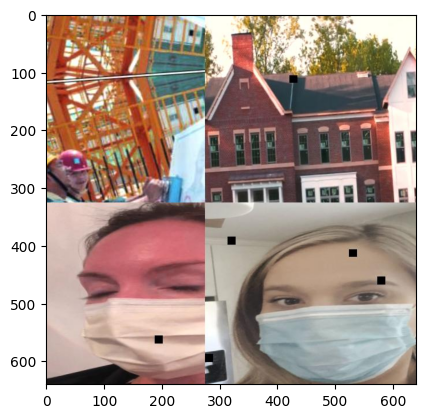

In [ ]:
example_image_path = '/content/kaggle/css-data/train/images/-1670-_png_jpg.rf.0463edb430019e01ec79eed27a6349d6.jpg'
display_image(example_image_path, print_info = True, hide_axis = False)

## Visualizando múltiplos exemplos do dataset

In [ ]:
def plot_random_images_from_folder(folder_path, num_images=20, seed=CFG.SEED):
    random.seed(seed)

    # Pega uma lista de imagens na pasta
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg', '.gif'))]

    # Garente que existe pelo menos o num_images de imagens presentes na pasta
    if len(image_files) < num_images:
        raise ValueError("Not enough images in the folder")

    # Seleciona algumas aleatoriamente
    selected_files = random.sample(image_files, num_images)

    # Cria um grid
    num_cols = 5
    num_rows = (num_images + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

    for i, file_name in enumerate(selected_files):
        img = Image.open(os.path.join(folder_path, file_name))

        if num_rows == 1:
            ax = axes[i % num_cols]
        else:
            ax = axes[i // num_cols, i % num_cols]

        ax.imshow(img)
        ax.axis('off')

    # Tira os sublots que ficaram vazios (depende do num_images)
    for i in range(num_images, num_rows * num_cols):
        if num_rows == 1:
            fig.delaxes(axes[i % num_cols])
        else:
            fig.delaxes(axes[i // num_cols, i % num_cols])

    plt.tight_layout()
    plt.show()

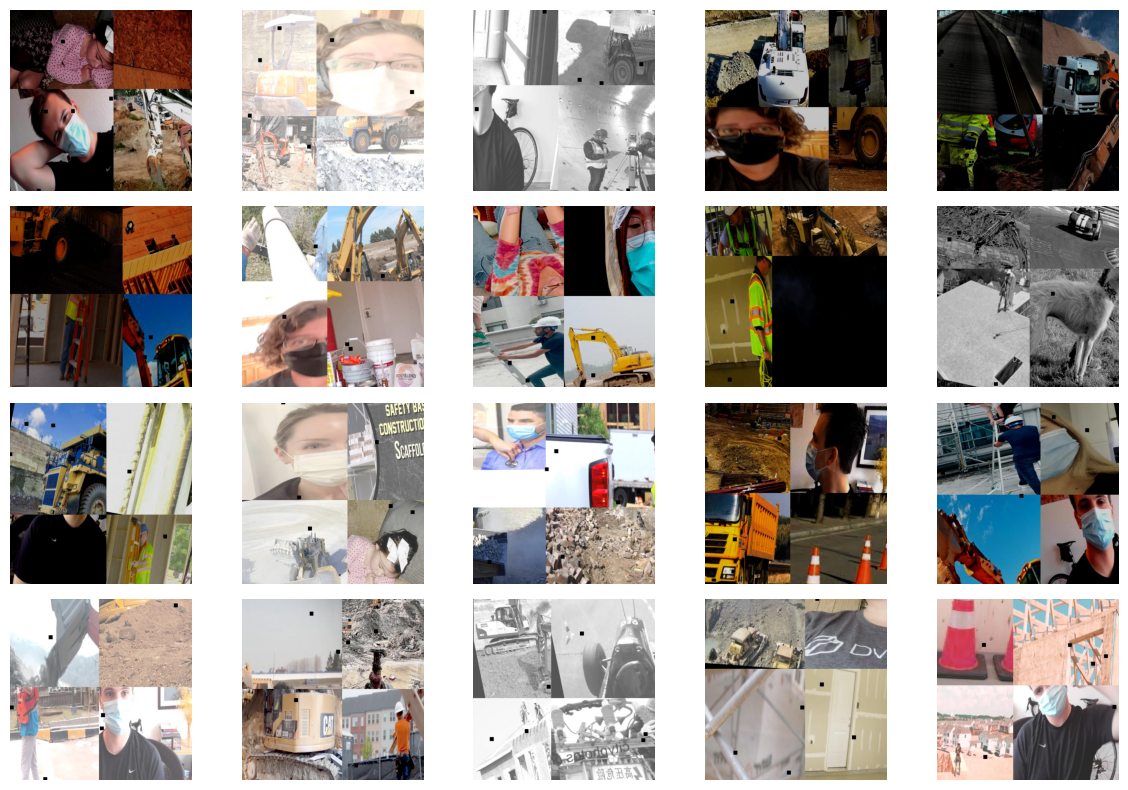

In [ ]:
folder_path = CFG.CUSTOM_DATASET_DIR + 'train/images/'
plot_random_images_from_folder(folder_path, num_images=20, seed=CFG.SEED)

In [ ]:
def get_image_properties(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError("Could not read image file")

    properties = {
        "width": img.shape[1],
        "height": img.shape[0],
        "channels": img.shape[2] if len(img.shape) == 3 else 1,
        "dtype": img.dtype,
    }

    return properties

## Análise de distribuição das classes

In [ ]:
img_properties = get_image_properties(example_image_path)
img_properties

{'width': 640, 'height': 640, 'channels': 3, 'dtype': dtype('uint8')}

In [ ]:
class_idx = {str(i): CFG.CLASSES[i] for i in range(CFG.NUM_CLASSES_TO_TRAIN)}

class_stat = {}
data_len = {}
class_info = []

for mode in ['train', 'valid', 'test']:
    class_count = {CFG.CLASSES[i]: 0 for i in range(CFG.NUM_CLASSES_TO_TRAIN)}

    path = os.path.join(CFG.CUSTOM_DATASET_DIR, mode, 'labels')

    for file in os.listdir(path):
        with open(os.path.join(path, file)) as f:
            lines = f.readlines()

            for cls in set([line[0] for line in lines]):
                class_count[class_idx[cls]] += 1

    data_len[mode] = len(os.listdir(path))
    class_stat[mode] = class_count

    class_info.append({'Mode': mode, **class_count, 'Data_Volume': data_len[mode]})

dataset_stats_df = pd.DataFrame(class_info)
dataset_stats_df

,Mode,Hardhat,Mask,NO-Hardhat,NO-Mask,NO-Safety Vest,Person,Safety Cone,Safety Vest,machinery,vehicle,Data_Volume
0,train,1314,1096,1380,1531,1864,2526,631,1319,2101,744,2605
1,valid,42,19,37,44,56,84,13,28,26,16,114
2,test,30,16,25,30,36,59,8,22,22,15,82


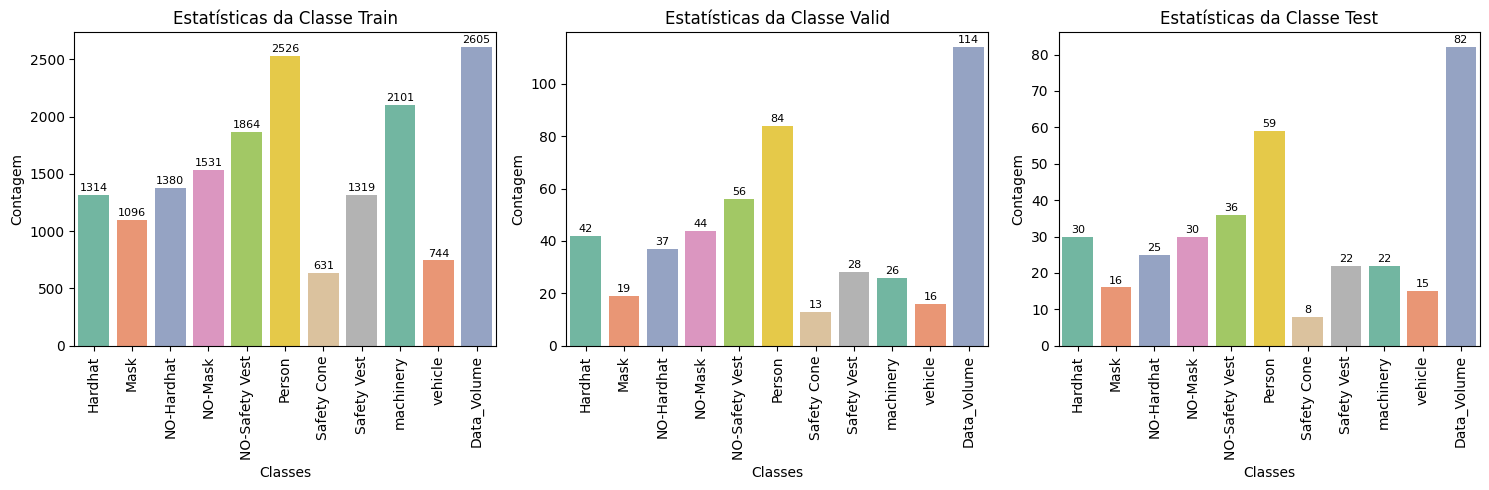

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plots de barras verticais para cada modalidade (train, valid, test)
for i, mode in enumerate(['train', 'valid', 'test']):
    sns.barplot(
        data=dataset_stats_df[dataset_stats_df['Mode'] == mode].drop(columns='Mode'),
        orient='v',
        ax=axes[i],
        palette='Set2'
    )

    axes[i].set_title(f'Estatísticas da Classe {mode.capitalize()}')
    axes[i].set_xlabel('Classes')
    axes[i].set_ylabel('Contagem')
    axes[i].tick_params(axis='x', rotation=90)

    # Anotação da contagem em cima de cada barra
    for p in axes[i].patches:
        axes[i].annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                         textcoords='offset points')

plt.tight_layout()
plt.show()

In [ ]:
# Checando formato das imagens em cada dataset
for mode in ['train', 'valid', 'test']:
    print(f'\nImage sizes in {mode} set:')

    img_size = 0
    for file in glob.glob(os.path.join(CFG.CUSTOM_DATASET_DIR, mode, 'images', '*')):

        image = Image.open(file)

        if image.size != img_size:
            print(f'{image.size}')
            img_size = image.size


Image sizes in train set:
(640, 640)

Image sizes in valid set:
(640, 640)

Image sizes in test set:
(640, 640)


# Teste de baseline do modelo

A baseline do modelo yolo11n será feita analisando suas predições no dataset de teste.

No entanto, é extremamente necessário notar que o modelo que estamos utilizando nunca foi treinado para classificar imagens de itens de segurança pessoal, portanto seria descabido pensar que a rede pudesse inferir tal tipo de objeto.

Para efeitos práticos, vamos testar numa imagem e ver o que o modelo nos retorna.

In [ ]:
print(CFG.BASE_MODEL_WEIGHTS)
model = YOLO(CFG.BASE_MODEL_WEIGHTS)

yolo11n.pt


100%|██████████| 5.35M/5.35M [00:00<00:00, 285MB/s]


In [ ]:
# Fazendo a predição numa única imagem
results = model.predict(
    source = example_image_path,

    classes = [0],
    conf = 0.30,
    device = [0,1], # inference with dual GPU
    imgsz = (img_properties['height'], img_properties['width']),

    save = True,
    save_txt = True,
    save_conf = True,
    exist_ok = True,
)


image 1/1 /content/kaggle/css-data/train/images/-1670-_png_jpg.rf.0463edb430019e01ec79eed27a6349d6.jpg: 640x640 2 persons, 26.0ms
Speed: 4.0ms preprocess, 26.0ms inference, 40.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
71 labels saved to runs/detect/predict/labels


Type:  <class 'PIL.JpegImagePlugin.JpegImageFile'> 

Shape:  (640, 640, 3) 



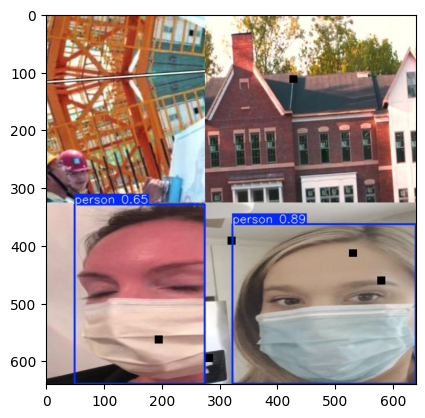

In [ ]:
example_image_inference_output = example_image_path.split('/')[-1]
display_image(f'/content/runs/detect/predict/{example_image_inference_output}')

O modelo é capaz de inferir razoavelmente bem quando há pessoas numa foto, mas na foto onde há pessoas usando capacete por exemplo não performou, como esperado.

# Fine-tuning (ajuste fino) do modelo


Em tarefas de computação visual, especialmente ao lidar com grandes conjuntos de dados, o treinamento de modelos de redes neurais profundas pode ser extremamente dispendioso em termos de tempo e recursos computacionais. Para resolver esse problema e acelerar o processo de treinamento, uma abordagem amplamente utilizada é o **fine-tuning**.

O **fine-tuning** envolve pegar um modelo que foi previamente treinado em um grande conjunto de dados (geralmente em uma tarefa genérica, como detecção de objetos em imagens ou classificação de imagens) e ajustá-lo para uma tarefa específica ou um novo conjunto de dados. Ao utilizar um modelo pré-treinado, geralmente não é necessário treinar o modelo desde o início, o que economiza tempo e recursos, além de aproveitar o conhecimento adquirido durante o treinamento prévio.

O principal objetivo do fine-tuning é adaptar um modelo já treinado para um novo domínio, onde as características do conjunto de dados podem ser semelhantes, mas não idênticas, ao conjunto original. Em um cenário de **fine-tuning**, a maioria das camadas da rede neural, especialmente aquelas responsáveis pela extração de características de baixo nível (como bordas e texturas), são mantidas, uma vez que são bastante gerais e aplicáveis a muitos tipos de imagens. As camadas mais profundas, que são responsáveis pela tomada de decisão final (como as camadas de classificação ou detecção), são ajustadas para aprender a distinguir os novos conceitos ou classes presentes no conjunto de dados específico.

Em modelos como o **YOLO**, o **fine-tuning** é uma estratégia comum. Em vez de treinar um modelo YOLO completamente do zero, que pode ser extremamente demorado e exigir um grande volume de dados, usamos pesos pré-treinados de modelos como o **YOLOv11**, que foram treinados em vastos conjuntos de dados como COCO ou ImageNet. Esses modelos pré-treinados já possuem uma boa capacidade de generalização e, ao ajustar suas camadas, podemos adaptá-los rapidamente para a tarefa específica em questão, como, por exemplo o cenário do presente projeto, detectar equipamentos de proteção individual (EPIs) em imagens de construções.

In [ ]:
print('Model: ', CFG.BASE_MODEL_WEIGHTS)
print('Epochs: ', CFG.EPOCHS)
print('Batch: ', CFG.BATCH_SIZE)

Model:  yolo11n.pt
Epochs:  100
Batch:  16


In [ ]:
# Vai demorar um bucado
model.train(
  data = os.path.join(CFG.OUTPUT_DIR, 'data.yaml'),

  task = 'detect',

  imgsz = (img_properties['height'], img_properties['width']),

  epochs = CFG.EPOCHS,
  batch = CFG.BATCH_SIZE,
  optimizer = CFG.OPTIMIZER,
  lr0 = CFG.LR,
  lrf = CFG.LR_FACTOR,
  weight_decay = CFG.WEIGHT_DECAY,
  dropout = CFG.DROPOUT,
  fraction = CFG.FRACTION,
  patience = CFG.PATIENCE,
  profile = CFG.PROFILE,
  label_smoothing = CFG.LABEL_SMOOTHING,

  name = f'{CFG.BASE_MODEL}_{CFG.EXP_NAME}',
  seed = CFG.SEED,

  val = True,
  amp = True,
  exist_ok = True,
  resume = False,
  device = 0,
  verbose = False,
)

WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in in the future.
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=./data.yaml, epochs=100, time=None, patience=20, batch=16, imgsz=(640, 640), save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolo11n_ppe_css_100_epochs, exist_ok=True, pretrained=True, optimizer=auto, verbose=False, seed=88, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, sa

100%|██████████| 755k/755k [00:00<00:00, 88.7MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/kaggle/css-data/train/labels... 2605 images, 6 backgrounds, 0 corrupt: 100%|██████████| 2605/2605 [00:01<00:00, 1520.12it/s]

train: WARNING ⚠️ /content/kaggle/css-data/train/images/004720_jpg.rf.afc486560a4004c7cfd67910af31a29c.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/kaggle/css-data/train/images/construction-813-_jpg.rf.b085952261fd98f2e76b8065de149b5f.jpg: 1 duplicate labels removed


train: New cache created: /content/kaggle/css-data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/kaggle/css-data/valid/labels... 114 images, 10 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<00:00, 1402.70it/s]

val: New cache created: /content/kaggle/css-data/valid/labels.cache


Plotting labels to runs/detect/yolo11n_ppe_css_100_epochs/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolo11n_ppe_css_100_epochs
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.24G      2.556      3.735      2.432        306        640: 100%|██████████| 163/163 [00:57<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.35it/s]

                   all        114        697      0.315      0.116     0.0507     0.0167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.88G      1.798      2.628      1.893        244        640: 100%|██████████| 163/163 [00:52<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]


                   all        114        697      0.292      0.251      0.203     0.0841

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.45G      1.545      2.141      1.694        346        640: 100%|██████████| 163/163 [00:52<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.56it/s]

                   all        114        697      0.623       0.29      0.352      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.85G      1.428      1.923      1.596        313        640: 100%|██████████| 163/163 [00:51<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.72it/s]

                   all        114        697      0.544      0.407      0.412      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.54G      1.371      1.814      1.543        316        640: 100%|██████████| 163/163 [00:52<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.92it/s]

                   all        114        697        0.6      0.396      0.435      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.26G      1.322      1.712      1.501        251        640: 100%|██████████| 163/163 [00:51<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]

                   all        114        697      0.629      0.421       0.47      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.19G      1.285      1.632      1.462        222        640: 100%|██████████| 163/163 [00:51<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.70it/s]

                   all        114        697      0.757      0.428      0.506      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.71G      1.267      1.574      1.443        246        640: 100%|██████████| 163/163 [00:51<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.93it/s]

                   all        114        697      0.676      0.452      0.516      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.69G      1.238      1.529      1.417        441        640: 100%|██████████| 163/163 [00:52<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]

                   all        114        697      0.681      0.501      0.551      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.42G      1.224      1.479        1.4        290        640: 100%|██████████| 163/163 [00:51<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.61it/s]


                   all        114        697      0.663      0.521       0.56      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       3.5G      1.195      1.434      1.381        301        640: 100%|██████████| 163/163 [00:51<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]

                   all        114        697      0.643      0.526      0.565      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.87G      1.185      1.405      1.373        284        640: 100%|██████████| 163/163 [00:51<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        114        697      0.713      0.534      0.583      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.29G      1.171      1.378      1.357        186        640: 100%|██████████| 163/163 [00:51<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.42it/s]

                   all        114        697      0.718      0.514       0.58      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.92G      1.172      1.358      1.354        235        640: 100%|██████████| 163/163 [00:52<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.25it/s]

                   all        114        697      0.715      0.543        0.6      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.09G      1.147      1.321      1.339        283        640: 100%|██████████| 163/163 [00:52<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.21it/s]

                   all        114        697       0.72      0.558      0.615      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.44G      1.151      1.297      1.336        332        640: 100%|██████████| 163/163 [00:51<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.47it/s]

                   all        114        697      0.726      0.549      0.611      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.14G      1.141      1.285      1.321        276        640: 100%|██████████| 163/163 [00:51<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all        114        697      0.742      0.562      0.619      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.39G      1.135      1.264      1.319        433        640: 100%|██████████| 163/163 [00:51<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all        114        697      0.799      0.555       0.64      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.79G      1.121      1.234      1.303        266        640: 100%|██████████| 163/163 [00:51<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]

                   all        114        697      0.779      0.536      0.621      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.22G      1.115      1.232      1.304        280        640: 100%|██████████| 163/163 [00:52<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.72it/s]

                   all        114        697      0.813      0.571      0.652      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.25G      1.104      1.209      1.292        367        640: 100%|██████████| 163/163 [00:51<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.81it/s]

                   all        114        697      0.763      0.615       0.65      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.48G      1.098      1.175      1.282        400        640: 100%|██████████| 163/163 [00:51<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.34it/s]

                   all        114        697      0.768      0.566      0.644      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.24G      1.094      1.192      1.288        242        640: 100%|██████████| 163/163 [00:52<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]

                   all        114        697      0.748      0.598      0.648      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       3.5G      1.086      1.167      1.282        321        640: 100%|██████████| 163/163 [00:51<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        114        697      0.779      0.599      0.653      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.52G       1.08      1.147      1.271        334        640: 100%|██████████| 163/163 [00:52<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all        114        697      0.778       0.62      0.667      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.64G      1.079      1.139      1.268        305        640: 100%|██████████| 163/163 [00:52<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]

                   all        114        697       0.77      0.618      0.659      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.35G      1.067       1.12      1.259        268        640: 100%|██████████| 163/163 [00:51<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.53it/s]

                   all        114        697      0.817      0.602      0.677      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.14G      1.062      1.107      1.255        196        640: 100%|██████████| 163/163 [00:51<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.03it/s]

                   all        114        697      0.852      0.587      0.672      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.94G       1.06        1.1       1.25        184        640: 100%|██████████| 163/163 [00:51<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]

                   all        114        697      0.788      0.626      0.678      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.35G      1.053      1.097      1.246        194        640: 100%|██████████| 163/163 [00:52<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.45it/s]

                   all        114        697      0.789      0.623      0.684      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.64G      1.045      1.085      1.245        281        640: 100%|██████████| 163/163 [00:52<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]

                   all        114        697      0.797      0.609      0.677      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.61G      1.047      1.081      1.246        290        640: 100%|██████████| 163/163 [00:51<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all        114        697      0.802      0.629      0.694      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       3.5G      1.038      1.072       1.23        305        640: 100%|██████████| 163/163 [00:52<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]


                   all        114        697      0.777      0.635      0.682      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       3.5G      1.023      1.052      1.227        282        640: 100%|██████████| 163/163 [00:51<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]

                   all        114        697      0.795      0.642      0.685      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.47G       1.04      1.057      1.235        296        640: 100%|██████████| 163/163 [00:51<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]

                   all        114        697      0.819      0.608      0.683      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.41G      1.027      1.041      1.232        287        640: 100%|██████████| 163/163 [00:52<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]

                   all        114        697      0.791      0.622      0.697      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.84G      1.017      1.037      1.222        224        640: 100%|██████████| 163/163 [00:52<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.75it/s]

                   all        114        697      0.792      0.635       0.69      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.67G      1.012      1.016      1.218        250        640: 100%|██████████| 163/163 [00:51<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        114        697      0.804      0.643       0.69      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.47G       1.01       1.02      1.211        262        640: 100%|██████████| 163/163 [00:51<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        114        697      0.802      0.616      0.693      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.36G      1.014      1.009      1.214        253        640: 100%|██████████| 163/163 [00:51<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.38it/s]


                   all        114        697      0.824      0.646      0.706      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.73G      1.016      1.011      1.216        247        640: 100%|██████████| 163/163 [00:51<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.96it/s]

                   all        114        697      0.815      0.636      0.699      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.41G      1.005      1.005      1.209        297        640: 100%|██████████| 163/163 [00:52<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.35it/s]

                   all        114        697      0.787      0.647      0.707      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.65G      1.004          1      1.207        217        640: 100%|██████████| 163/163 [00:51<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.48it/s]

                   all        114        697      0.871      0.628      0.717      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.58G     0.9939     0.9952      1.205        247        640: 100%|██████████| 163/163 [00:52<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.16it/s]


                   all        114        697      0.814       0.64      0.705      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.26G     0.9932     0.9868      1.204        185        640: 100%|██████████| 163/163 [00:51<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        114        697       0.83       0.63      0.705      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.15G     0.9961     0.9881      1.204        197        640: 100%|██████████| 163/163 [00:51<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]

                   all        114        697      0.849      0.621      0.709      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.46G     0.9864     0.9743      1.195        254        640: 100%|██████████| 163/163 [00:51<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.70it/s]

                   all        114        697      0.803      0.658      0.712      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.35G     0.9796     0.9607      1.192        292        640: 100%|██████████| 163/163 [00:51<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.30it/s]

                   all        114        697      0.808      0.648      0.717      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.24G     0.9844     0.9592      1.191        189        640: 100%|██████████| 163/163 [00:51<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.85it/s]

                   all        114        697      0.845      0.628      0.715      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.35G     0.9904     0.9709      1.193        271        640: 100%|██████████| 163/163 [00:51<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.90it/s]

                   all        114        697      0.836      0.633      0.715        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.38G     0.9761     0.9459      1.188        262        640: 100%|██████████| 163/163 [00:50<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]

                   all        114        697      0.855      0.649      0.724      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.66G     0.9739     0.9382      1.187        254        640: 100%|██████████| 163/163 [00:52<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        114        697      0.843      0.638      0.727      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.47G     0.9596     0.9352      1.182        225        640: 100%|██████████| 163/163 [00:52<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.96it/s]

                   all        114        697      0.811      0.655      0.727      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.59G     0.9613      0.932      1.181        196        640: 100%|██████████| 163/163 [00:52<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.87it/s]

                   all        114        697      0.825      0.646      0.713      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.85G     0.9608     0.9402      1.179        207        640: 100%|██████████| 163/163 [00:52<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.94it/s]

                   all        114        697       0.79      0.658      0.723      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.19G       0.96     0.9233      1.174        243        640: 100%|██████████| 163/163 [00:52<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]

                   all        114        697      0.797      0.656      0.719      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.16G     0.9608     0.9216      1.172        297        640: 100%|██████████| 163/163 [00:52<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.96it/s]

                   all        114        697      0.829      0.637      0.721      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.59G      0.956     0.9247      1.176        155        640: 100%|██████████| 163/163 [00:52<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all        114        697      0.865      0.622      0.716      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.47G     0.9518     0.9188      1.169        292        640: 100%|██████████| 163/163 [00:52<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        114        697       0.86       0.64      0.726      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.25G     0.9512     0.9146      1.171        444        640: 100%|██████████| 163/163 [00:52<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.34it/s]

                   all        114        697      0.854      0.636      0.727       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       3.5G     0.9488     0.9073      1.167        405        640: 100%|██████████| 163/163 [00:52<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.83it/s]

                   all        114        697       0.82      0.676      0.734      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.12G     0.9487     0.9016      1.168        204        640: 100%|██████████| 163/163 [00:50<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.83it/s]

                   all        114        697      0.875      0.655      0.737      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.65G     0.9375     0.8875      1.162        256        640: 100%|██████████| 163/163 [00:51<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]

                   all        114        697      0.828       0.67      0.738      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100         3G     0.9453     0.8962      1.163        245        640: 100%|██████████| 163/163 [00:52<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        114        697      0.819      0.683      0.735      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       3.3G     0.9402     0.8961      1.163        368        640: 100%|██████████| 163/163 [00:51<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]

                   all        114        697       0.83      0.671       0.74      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.56G     0.9346     0.8869      1.158        226        640: 100%|██████████| 163/163 [00:51<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.60it/s]

                   all        114        697      0.805      0.673      0.733      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.36G      0.939     0.8791      1.155        297        640: 100%|██████████| 163/163 [00:52<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.95it/s]

                   all        114        697      0.843      0.662      0.742      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.29G     0.9279     0.8813       1.16        238        640: 100%|██████████| 163/163 [00:52<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.69it/s]

                   all        114        697      0.845      0.659      0.742      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       3.8G     0.9381     0.8818      1.158        269        640: 100%|██████████| 163/163 [00:52<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.31it/s]

                   all        114        697      0.824      0.679      0.743      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.18G     0.9295      0.874      1.154        275        640: 100%|██████████| 163/163 [00:53<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]

                   all        114        697      0.853      0.653       0.74      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.59G     0.9205     0.8682      1.153        294        640: 100%|██████████| 163/163 [00:52<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        114        697      0.847      0.674      0.741      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.41G     0.9181     0.8595      1.146        283        640: 100%|██████████| 163/163 [00:52<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.20it/s]

                   all        114        697      0.827      0.667       0.74       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.33G     0.9285     0.8676      1.153        245        640: 100%|██████████| 163/163 [00:53<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]

                   all        114        697       0.79      0.686      0.739      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.21G     0.9169      0.858      1.145        261        640: 100%|██████████| 163/163 [00:51<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.40it/s]

                   all        114        697      0.827      0.665      0.736      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100       3.4G     0.9183     0.8534      1.147        304        640: 100%|██████████| 163/163 [00:52<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.49it/s]

                   all        114        697      0.826      0.665      0.738      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.63G     0.9145     0.8601      1.148        294        640: 100%|██████████| 163/163 [00:52<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        114        697       0.85      0.663      0.741      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.23G     0.9109     0.8496      1.143        304        640: 100%|██████████| 163/163 [00:52<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]


                   all        114        697      0.825      0.676      0.739      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.43G     0.9168     0.8521      1.147        239        640: 100%|██████████| 163/163 [00:52<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.90it/s]

                   all        114        697       0.82      0.685      0.744      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.58G     0.9071     0.8455      1.144        305        640: 100%|██████████| 163/163 [00:52<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.14it/s]

                   all        114        697      0.814      0.675      0.741      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.93G     0.9171     0.8522      1.145        256        640: 100%|██████████| 163/163 [00:53<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]

                   all        114        697      0.806      0.707      0.749      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.29G      0.906     0.8427      1.144        432        640: 100%|██████████| 163/163 [00:52<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.29it/s]

                   all        114        697      0.822      0.685       0.74      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100       3.5G     0.9128      0.848      1.143        285        640: 100%|██████████| 163/163 [00:52<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]

                   all        114        697      0.816      0.695       0.75      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.31G     0.8994     0.8337      1.136        273        640: 100%|██████████| 163/163 [00:51<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.16it/s]


                   all        114        697      0.845      0.689       0.75      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.33G     0.9053      0.835      1.139        293        640: 100%|██████████| 163/163 [00:52<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.82it/s]


                   all        114        697      0.866      0.655      0.747       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.36G     0.8855     0.8293      1.138        327        640: 100%|██████████| 163/163 [00:52<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]

                   all        114        697      0.845      0.666      0.744      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.41G     0.8969     0.8327      1.133        301        640: 100%|██████████| 163/163 [00:52<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.91it/s]


                   all        114        697      0.847      0.667      0.744      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.39G     0.9058     0.8321      1.138        257        640: 100%|██████████| 163/163 [00:52<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        114        697      0.837      0.667      0.743       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.44G     0.8952     0.8209      1.134        304        640: 100%|██████████| 163/163 [00:52<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]

                   all        114        697      0.812      0.683      0.748      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.15G     0.9071     0.8327      1.135        226        640: 100%|██████████| 163/163 [00:52<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.33it/s]

                   all        114        697      0.836      0.672      0.749      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.75G     0.8958     0.8261      1.133        335        640: 100%|██████████| 163/163 [00:52<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.30it/s]

                   all        114        697      0.857      0.657      0.744      0.435


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.05G      0.906     0.7576      1.136        121        640: 100%|██████████| 163/163 [00:52<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.97it/s]

                   all        114        697      0.863      0.651      0.739      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.14G     0.8899     0.7266       1.13        166        640: 100%|██████████| 163/163 [00:51<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]

                   all        114        697      0.807      0.697      0.742       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.04G     0.8913     0.7216      1.121        228        640: 100%|██████████| 163/163 [00:51<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.31it/s]

                   all        114        697      0.818      0.692      0.748       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.24G     0.8835     0.7156      1.122        165        640: 100%|██████████| 163/163 [00:50<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.99it/s]

                   all        114        697      0.821      0.698      0.751      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.21G     0.8775     0.7091      1.123        210        640: 100%|██████████| 163/163 [00:51<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.92it/s]

                   all        114        697      0.807      0.688      0.746      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.17G      0.874     0.7053      1.119        196        640: 100%|██████████| 163/163 [00:50<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]

                   all        114        697      0.824      0.683      0.748      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.79G     0.8679     0.6994      1.112        174        640: 100%|██████████| 163/163 [00:49<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.88it/s]

                   all        114        697      0.817      0.688      0.753      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.21G     0.8724     0.7012      1.114        179        640: 100%|██████████| 163/163 [00:50<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.47it/s]


                   all        114        697      0.819       0.69      0.756      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.11G     0.8711      0.696      1.115        143        640: 100%|██████████| 163/163 [00:50<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        114        697      0.817      0.684      0.749      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.83G     0.8698      0.698      1.117        133        640: 100%|██████████| 163/163 [00:50<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]

                   all        114        697      0.823      0.695      0.753      0.443



100 epochs completed in 1.506 hours.
Optimizer stripped from runs/detect/yolo11n_ppe_css_100_epochs/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/yolo11n_ppe_css_100_epochs/weights/best.pt, 5.5MB

Validating runs/detect/yolo11n_ppe_css_100_epochs/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,584,102 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.09it/s]


                   all        114        697       0.82      0.691      0.755      0.449
Speed: 0.3ms preprocess, 3.8ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to runs/detect/yolo11n_ppe_css_100_epochs


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7994a0d68f40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

# Exportando e avaliando resultado de treino

O modelo já pode ser encontrado em:

```
runs/detect/yolo11n_ppe_css_100_epochs/weights/best.pt
```
No entanto, também pode-se exportar o modelo parar o formato .onnx `(Open Neural Network Exchange)` que é compatível com múltiplas plataformas (TensorFlow, PyTorch, etc).


In [ ]:
model.export(
    format = 'onnx', # openvino, onnx, engine, tflite
    imgsz = (img_properties['height'], img_properties['width']),
    half = False,
    int8 = False,
    simplify = False,
    nms = False,
)

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,584,102 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from 'runs/detect/yolo11n_ppe_css_100_epochs/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 14, 8400) (5.2 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 254.3 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 5.1s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: export success ✅ 6.0s, saved as 'runs/detect/yolo11n_ppe_css_100_epochs/weights/best.onnx' (10.1 MB)

Export complete (7.7s)
Results saved to /content/runs/detect/yolo11n_ppe_css_100_epochs/weights
Predict:         yolo predict task=detect model=runs/detect/yolo11n_ppe_css_100_epochs/wei

'runs/detect/yolo11n_ppe_css_100_epochs/weights/best.onnx'

In [ ]:
results_paths = [
    i for i in
    glob.glob(f'{CFG.OUTPUT_DIR}runs/detect/{CFG.BASE_MODEL}_{CFG.EXP_NAME}/*.png') +
    glob.glob(f'{CFG.OUTPUT_DIR}runs/detect/{CFG.BASE_MODEL}_{CFG.EXP_NAME}/*.jpg')
    if 'batch' not in i
]

results_paths

['./runs/detect/yolo11n_ppe_css_100_epochs/R_curve.png',
 './runs/detect/yolo11n_ppe_css_100_epochs/P_curve.png',
 './runs/detect/yolo11n_ppe_css_100_epochs/PR_curve.png',
 './runs/detect/yolo11n_ppe_css_100_epochs/results.png',
 './runs/detect/yolo11n_ppe_css_100_epochs/confusion_matrix_normalized.png',
 './runs/detect/yolo11n_ppe_css_100_epochs/F1_curve.png',
 './runs/detect/yolo11n_ppe_css_100_epochs/confusion_matrix.png',
 './runs/detect/yolo11n_ppe_css_100_epochs/labels.jpg',
 './runs/detect/yolo11n_ppe_css_100_epochs/labels_correlogram.jpg']

./runs/detect/yolo11n_ppe_css_100_epochs/F1_curve.png


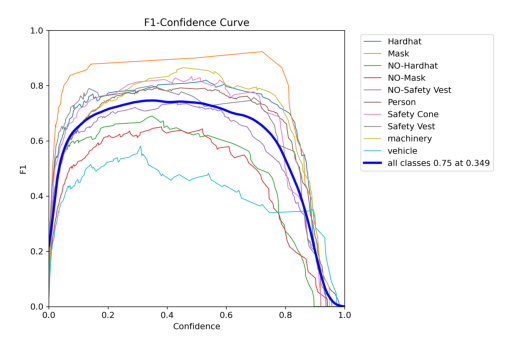



./runs/detect/yolo11n_ppe_css_100_epochs/PR_curve.png


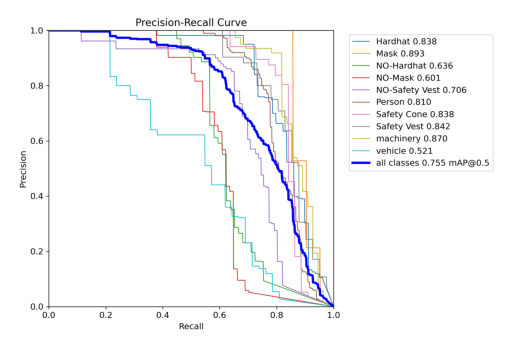



./runs/detect/yolo11n_ppe_css_100_epochs/P_curve.png


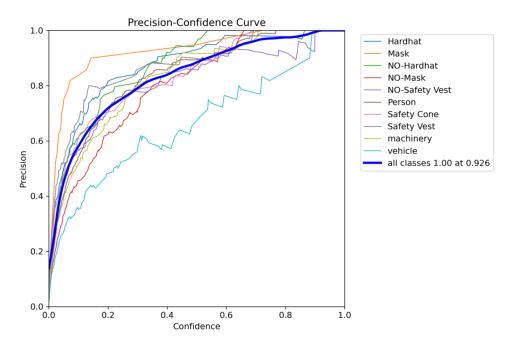



./runs/detect/yolo11n_ppe_css_100_epochs/R_curve.png


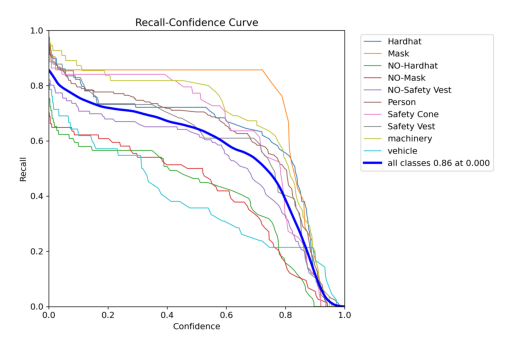



./runs/detect/yolo11n_ppe_css_100_epochs/confusion_matrix.png


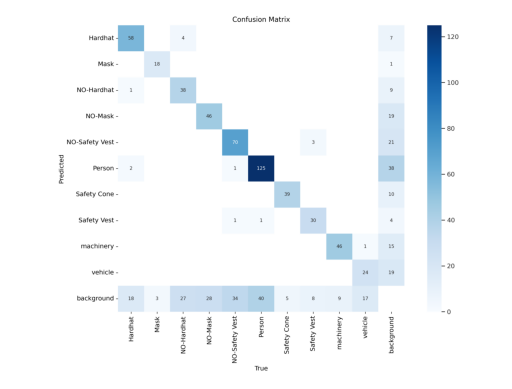



./runs/detect/yolo11n_ppe_css_100_epochs/confusion_matrix_normalized.png


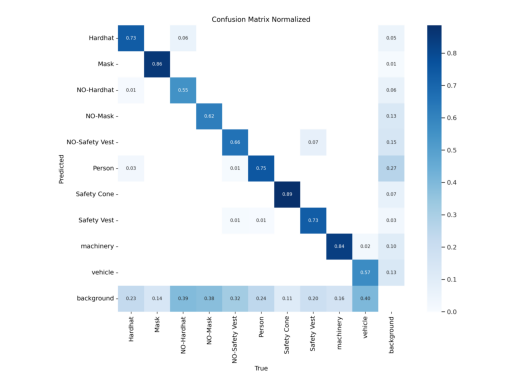



./runs/detect/yolo11n_ppe_css_100_epochs/labels.jpg


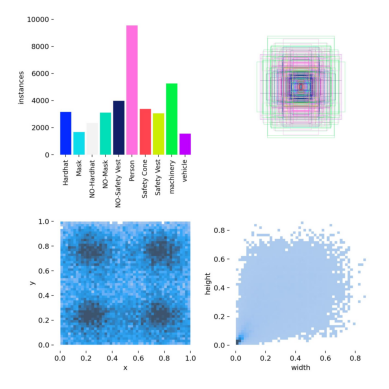



./runs/detect/yolo11n_ppe_css_100_epochs/labels_correlogram.jpg


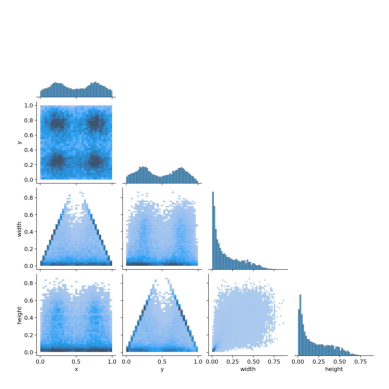



./runs/detect/yolo11n_ppe_css_100_epochs/results.png


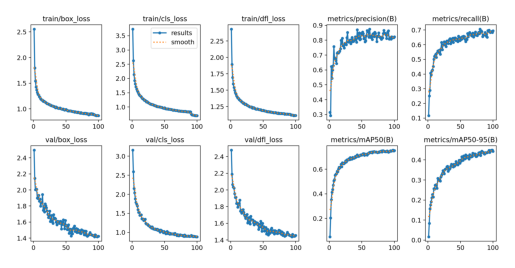

In [ ]:
for file in sorted(results_paths):
    print(file)
    display_image(file, print_info = False, hide_axis = True)
    print('\n')

## Loss

A função de loss dos treinamentos em redes YOLO consistem em 3 componentes principais: box loss, class loss e dfl loss.

A box loss é como um árbitro que avalia o quão preciso está o modelo na localização de objetos dentro de uma imagem. Imagine que o modelo precisa desenhar um quadrado exatamente em volta de um objeto - por exemplo, em volta de um capacete em uma imagem de construção. A box loss mede o quanto esse quadrado desenhado pelo modelo se aproxima ou se afasta do quadrado real onde o objeto está localizado. Quanto menor for essa distância, mais preciso o modelo está sendo na localização do objeto.

A classification loss, ou cls loss, funciona como um professor rigoroso que verifica se o aluno identificou corretamente o que é cada objeto. Continuando no exemplo do capacete, essa loss checa se quando o modelo identifica um objeto dentro daquela caixa delimitadora, ele realmente está classificando como "Capacete" e não como "Pessoa" ou "Máquina". É como um teste de múltipla escolha onde o modelo precisa acertar exatamente a classe do objeto.

Já a distribution focal loss, ou DFL loss, é um pouco mais sofisticada. Pense nela como um refinador de precisão. Não basta apenas localizar o objeto e identificar sua classe, é preciso ter certeza da qualidade dessa predição. A DFL loss trabalha nos detalhes, olhando para a distribuição das probabilidades de predição. Ela ajuda o modelo a ser mais confiante quando está realmente certo e mais cauteloso quando há ambiguidade. É como um especialista que não só diz o que é o objeto, mas também o quão seguro está dessa identificação.

Essas três losses trabalham juntas como uma equipe de avaliação, cada uma focando em um aspecto diferente da detecção de objetos: localização, classificação e confiança na predição. O objetivo final é treinar o modelo para ser o mais preciso possível em identificar e localizar objetos em imagens.

In [ ]:
df = pd.read_csv(f'{CFG.OUTPUT_DIR}runs/detect/{CFG.BASE_MODEL}_{CFG.EXP_NAME}/results.csv')
df = df.rename(columns=lambda x: x.replace(" ", ""))
df.to_csv(f'{CFG.OUTPUT_DIR}training_log_df.csv', index=False)
df

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,65.1913,2.55552,3.73497,2.43239,0.31492,0.11645,0.05067,0.01671,2.49684,3.15939,2.47772,0.000237,0.000237,0.000237
1,2,119.3710,1.79813,2.62766,1.89313,0.29242,0.25063,0.20343,0.08406,2.14524,2.59174,2.18834,0.000470,0.000470,0.000470
2,3,173.4680,1.54466,2.14085,1.69438,0.62289,0.28957,0.35188,0.15584,2.00162,2.15013,2.06420,0.000698,0.000698,0.000698
3,4,226.9950,1.42757,1.92349,1.59628,0.54352,0.40688,0.41246,0.17579,2.00751,2.04091,2.03372,0.000693,0.000693,0.000693
4,5,282.2640,1.37119,1.81413,1.54349,0.59999,0.39572,0.43455,0.19114,2.00831,1.88256,2.02245,0.000686,0.000686,0.000686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,5211.6300,0.87404,0.70532,1.11865,0.82351,0.68309,0.74808,0.44324,1.43315,0.89783,1.45751,0.000042,0.000042,0.000042
96,97,5263.3400,0.86792,0.69939,1.11173,0.81666,0.68841,0.75284,0.44766,1.42135,0.88970,1.44598,0.000035,0.000035,0.000035
97,98,5315.4500,0.87240,0.70125,1.11390,0.81866,0.69007,0.75551,0.44912,1.41660,0.88876,1.44621,0.000028,0.000028,0.000028
98,99,5367.7800,0.87108,0.69603,1.11532,0.81685,0.68371,0.74931,0.44890,1.41970,0.88730,1.44734,0.000021,0.000021,0.000021


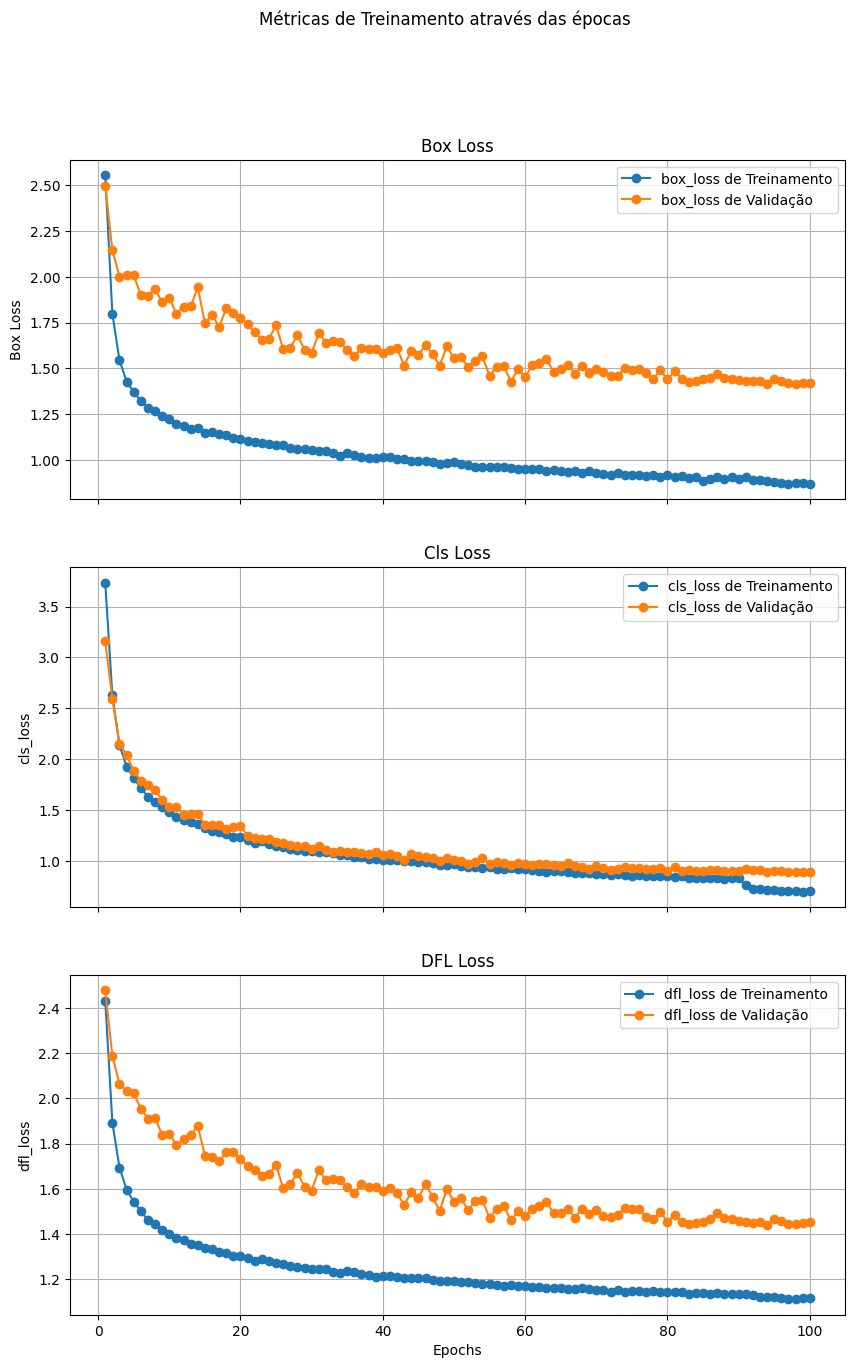

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

ax1.set_title('Box Loss')
ax1.plot(df['epoch'], df['train/box_loss'], label='box_loss de Treinamento', marker='o', linestyle='-')
ax1.plot(df['epoch'], df['val/box_loss'], label='box_loss de Validação', marker='o', linestyle='-')
ax1.set_ylabel('Box Loss')
ax1.legend()
ax1.grid(True)

# cls_loss de Treinamento e Validação
ax2.set_title('Cls Loss')
ax2.plot(df['epoch'], df['train/cls_loss'], label='cls_loss de Treinamento', marker='o', linestyle='-')
ax2.plot(df['epoch'], df['val/cls_loss'], label='cls_loss de Validação ', marker='o', linestyle='-')
ax2.set_ylabel('cls_loss')
ax2.legend()
ax2.grid(True)

# dfl_loss de Treinamento e Validação
ax3.set_title('DFL Loss')
ax3.plot(df['epoch'], df['train/dfl_loss'], label='dfl_loss de Treinamento ', marker='o', linestyle='-')
ax3.plot(df['epoch'], df['val/dfl_loss'], label='dfl_loss de Validação ', marker='o', linestyle='-')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('dfl_loss')
ax3.legend()
ax3.grid(True)

plt.suptitle('Métricas de Treinamento através das épocas')
plt.show()

In [ ]:
validation_results_paths = [
    i for i in
    glob.glob(f'{CFG.OUTPUT_DIR}runs/detect/{CFG.BASE_MODEL}_{CFG.EXP_NAME}/*.png') +
    glob.glob(f'{CFG.OUTPUT_DIR}runs/detect/{CFG.BASE_MODEL}_{CFG.EXP_NAME}/*.jpg')
    if 'val_batch' in i
]

len(validation_results_paths)

In [ ]:
# Checando predições para um conjunto aleatório de validação
if len(validation_results_paths) >= 1:
    val_img_path = random.choice(validation_results_paths)
    print(val_img_path)
    display_image(val_img_path, print_info = False, hide_axis = True)